<img src="black-friday-logo-feature.jpg"></img>

## Problem Statement
A retail company “XYZ” wants to understand the customer purchase behaviour against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

Dataset is available on Kaggle. You can download it from <a href="https://www.kaggle.com/sdolezel/black-friday">here</a>.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

print("Libraries imported")

Libraries imported


In [2]:
data=pd.read_csv('blackFriday_train.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
print("Shape of Train dataset:",data.shape)

Shape of Train dataset: (550068, 12)


In [4]:
data_test=pd.read_csv('blackFriday_test.csv')
data_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
print("Shape of Train dataset:",data_test.shape)

Shape of Train dataset: (233599, 11)


In [6]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [10]:
data.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [11]:
data.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [12]:
cat_columns=['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']

for value in cat_columns:
    print(value,":",data[value].unique())
    print(data[value].value_counts())
    print("*****************************")

Gender : ['F' 'M']
M    414259
F    135809
Name: Gender, dtype: int64
*****************************
Age : ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64
*****************************
Occupation : [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64
*****************************
City_Category : ['A' 'C' 'B']
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64
*****************************
Stay_In_Current_City_Years : ['2' '4+' '3' '1' '0']
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, d

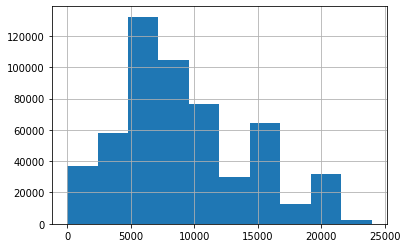

In [13]:
data['Purchase'].hist()

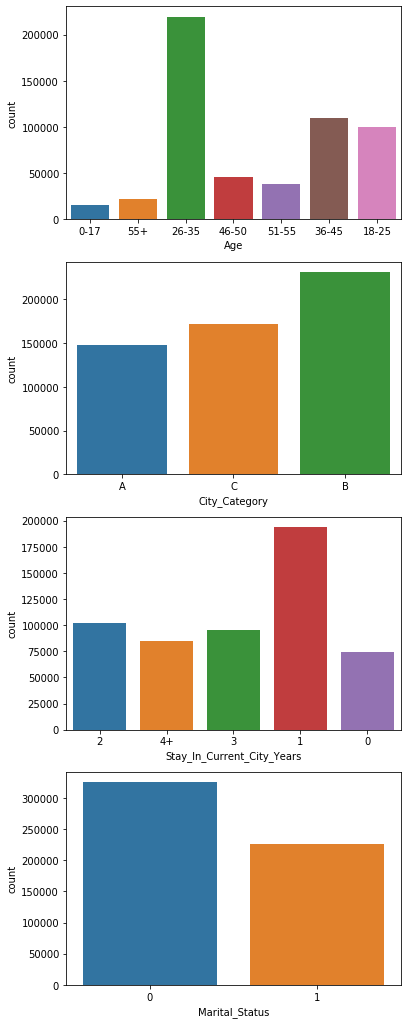

In [14]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(6, 18))

sns.countplot(x='Age', data=data, ax=axes[0]);
sns.countplot(x='City_Category', data=data, ax=axes[1])
sns.countplot(x='Stay_In_Current_City_Years', data=data, ax=axes[2]);
sns.countplot(x='Marital_Status', data=data, ax=axes[3])

### Purchases based on Gender

Text(0.5, 1.0, 'Purchase in black friday based on gender')

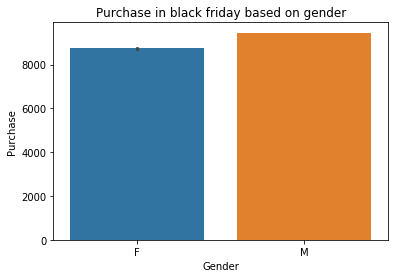

In [15]:
#Plot a barplot

sns.barplot(x='Gender',y='Purchase',data=data)
plt.title("Purchase in black friday based on gender")

Males buying purchases are higher than females, but the difference in not much.

### Count of Male and Female Buyers

In [16]:
#Calculate no. of male and female buyers and then create a pie chart out of it

maleBuyers=data[data['Gender']=="M"].shape[0]
femaleBuyers=data[data['Gender']=="F"].shape[0]
print("No. of male buyers:", maleBuyers)
print("No. of female buyers:",femaleBuyers)

No. of male buyers: 414259
No. of female buyers: 135809


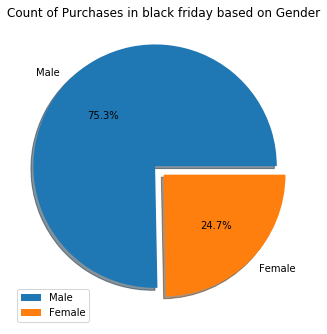

In [17]:
#Create pie chart

plt.figure(figsize=(5,5))
plt.pie([maleBuyers,femaleBuyers], labels=["Male","Female"],
              explode=[0.1,0],
              autopct='%1.1f%%',
              shadow=True,
              startangle=0,
              labeldistance=1.1,
              pctdistance=.6)

plt.legend(["Male","Female"])
plt.title('Count of Purchases in black friday based on Gender')
plt.tight_layout()
plt.show()

Number of Male buyers is more significant than that of Femle buyers.

### Purchases based on Occupation and City_Category

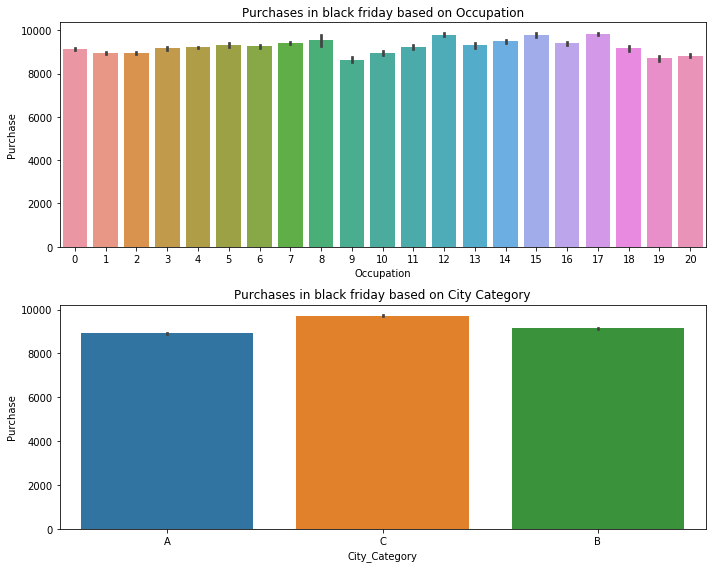

In [18]:
#Create a barplot

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))


sns.barplot(x='Occupation',y='Purchase', data=data, ax=axes[0])
axes[0].set_title("Purchases in black friday based on Occupation")
sns.barplot(x='City_Category',y='Purchase', data=data, ax=axes[1])
axes[1].set_title("Purchases in black friday based on City Category")

plt.tight_layout()

There is no significant effect of `Occupation` on Purchase, since purhcase values at each occupation value are nearest to each other.

There is not much difference from one `City Category` to another, but we can say that people who live in city of category C purchase more than other peoples who live cities of category A or B.


### Purchases based on Age and Marital Status

Text(0.5, 1.0, 'Purchases in black friday based on Marital Status')

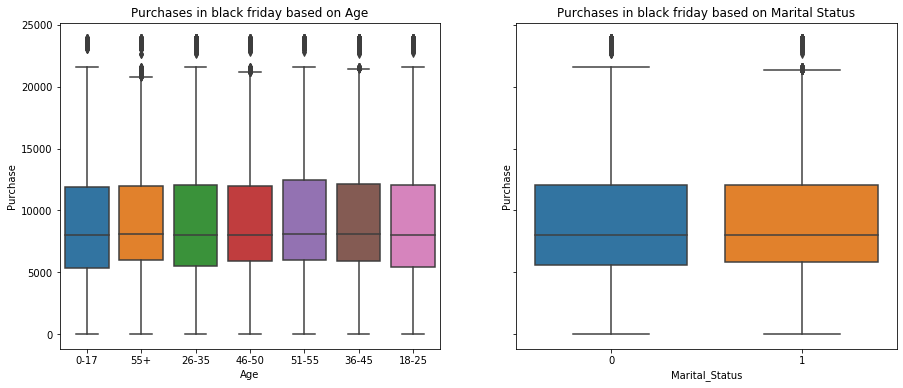

In [19]:
#Create a boxplot

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,6))
sns.boxplot(x='Age',y='Purchase',data=data,ax=axes[0])
axes[0].set_title("Purchases in black friday based on Age")
sns.boxplot(x='Marital_Status',y='Purchase',data=data,ax=axes[1])
axes[1].set_title("Purchases in black friday based on Marital Status")

Purchasers of different `Age` group has almost same purchases

Purchasers who are `Married` and not married has same purchases

### Handle Missing Values

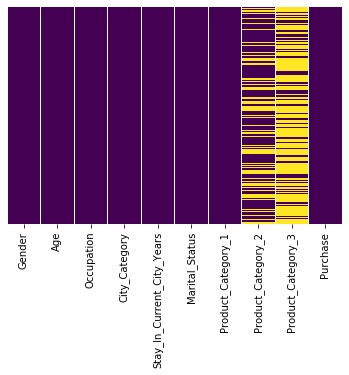

In [20]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Majorly two columns has null values that are `Product_Category_2` and `Product_Category_3`

In [21]:
print("Percentage missing values for Product_Category_2:",data['Product_Category_2'].isnull().sum()/data['Product_Category_2'].isnull().count())
print("Percentage missing values for Product_Category_3:",data['Product_Category_3'].isnull().sum()/data['Product_Category_3'].isnull().count())

Percentage missing values for Product_Category_2: 0.3156664266963357
Percentage missing values for Product_Category_3: 0.6967265865311197


We can drop variable where missing values are par 60%, beacuse these variables are useless. Thus drop `Product_Category_3`.

Using <b>SimpleImputer</b> for populating missing values in `Product_Category_2` column.

In [22]:
from sklearn.impute import SimpleImputer

#Initialize SimpleImputer method
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

#fit imputer object on only numeric data
imputer = imputer.fit(pd.DataFrame(data['Product_Category_2']))

#fit_transform imputer object on only numeric data
data['Product_Category_2'] = imputer.fit_transform(pd.DataFrame(data['Product_Category_2']))

#rounding value
data['Product_Category_2'] = np.round(data['Product_Category_2'])

print("Product_Category_2 column imputed successfully")

Product_Category_2 column imputed successfully


In [23]:
data.drop('Product_Category_3',axis=1,inplace=True)
print("Product_Category_3 column dropped successfully")

Product_Category_3 column dropped successfully


In [24]:
#print max count number of null values
print('Number of missing values = ',data.isnull().sum().max())

Number of missing values =  0


Hence all the null values are handled either by `deletion` method or `imputation` method.

### Visualizing Product_category1 Vs Purchase

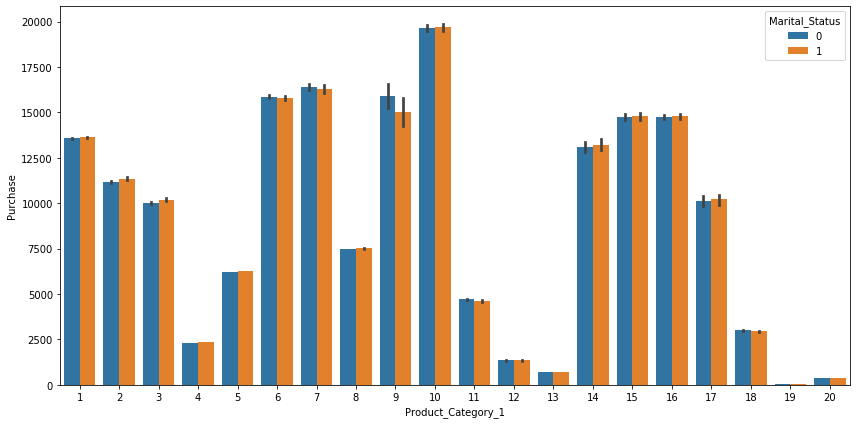

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(x='Product_Category_1',y='Purchase',hue='Marital_Status',data=data)
plt.tight_layout()

### Visualizing Product_category2 Vs Purchase

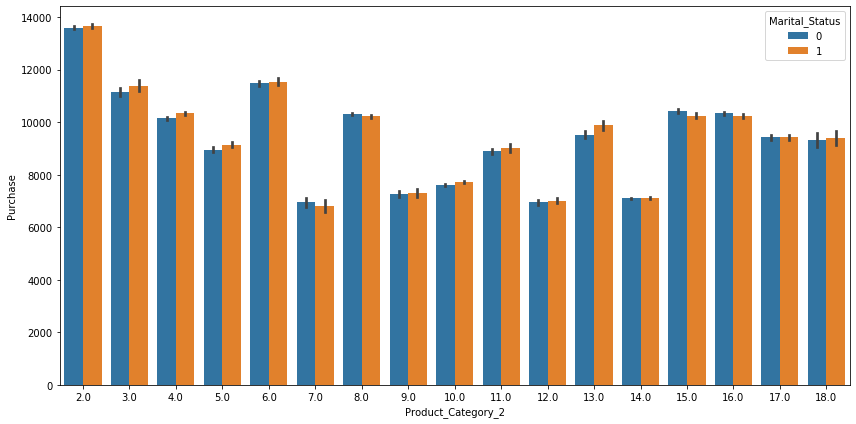

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(x='Product_Category_2',y='Purchase',hue='Marital_Status',data=data)
plt.tight_layout()

One thing we can clearly conclude is that there is no such variation in the percentage of the purchasing whether the person is married or not. `Product_category_1`is much more purchased by people than `Product_category_2`

### Handle Categorical Features

Map `Age` feature to corresponding upper limit age 

In [27]:
data['Age']=data['Age'].map({'0-17':17, '18-25':25, '26-35':35, '36-45':45, '46-50':50, '51-55':55, '55+':60 })

Apply `get_dummies` to our `City_Category` to create Dummy Variable

In [28]:
#To exclude One dummy variable, use drop_first paramter 
city = pd.get_dummies(data['City_Category'],drop_first=True)
city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
550063,1,0
550064,0,1
550065,1,0
550066,0,1


In [29]:
#Concatenating both tables  
data = pd.concat([data,city],axis=1)

#Drop City_Category column
data.drop('City_Category',axis=1,inplace=True)

#Check dataset after transformation
data.head() 

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,B,C
0,F,17,10,2,0,3,10.0,8370,0,0
1,F,17,10,2,0,1,6.0,15200,0,0
2,F,17,10,2,0,12,10.0,1422,0,0
3,F,17,10,2,0,12,14.0,1057,0,0
4,M,60,16,4+,0,8,10.0,7969,0,1


Using `Label Encoder` to transform `Gender` categorical feature

In [30]:
#Import Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#Apply fit_transform 
data['Gender']=le.fit_transform(data['Gender'].astype('str'))

In `Marital_Status`, there is a category of value 4+ which is not numeric value, so replacing it with 4

In [31]:
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].replace('4+',4)

Check data after `Handling Categorical Features`

In [32]:
data.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,B,C
0,0,17,10,2,0,3,10.0,8370,0,0
1,0,17,10,2,0,1,6.0,15200,0,0
2,0,17,10,2,0,12,10.0,1422,0,0
3,0,17,10,2,0,12,14.0,1057,0,0
4,1,60,16,4,0,8,10.0,7969,0,1


### Feature Scaling

In [33]:
#Import StandardScaler
from sklearn.preprocessing import StandardScaler

#Create object of StandardScaler
scaler = StandardScaler()

#Apply fit
scaler.fit(data.drop('Purchase',axis=1))

#Apply transform
scaled_features = scaler.transform(data.drop('Purchase',axis=1))

In [34]:
feature_variables=['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'B', 'C']

data_after_scaling=pd.DataFrame(scaled_features,columns=feature_variables)

Check data after `Feature Engineering`

In [35]:
data_after_scaling.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,B,C
0,-1.746513,-2.059570,0.294864,0.109801,-0.833018,-0.610809,0.025639,-0.851422,-0.672143
1,-1.746513,-2.059570,0.294864,0.109801,-0.833018,-1.118912,-0.924822,-0.851422,-0.672143
2,-1.746513,-2.059570,0.294864,0.109801,-0.833018,1.675656,0.025639,-0.851422,-0.672143
3,-1.746513,-2.059570,0.294864,0.109801,-0.833018,1.675656,0.976099,-0.851422,-0.672143
4,0.572570,2.094842,1.214734,1.660861,-0.833018,0.659449,0.025639,-0.851422,1.487778


Now this data can be fed to any Machine Learning model